# Practica 1
**Tecnologías de Lenguaje Natural**

*Luis Fernando Rodríguez Domínguez*

5BV1

*Ingeniería en Inteligencia Artificial*

Fecha última de modificación: 12 de marzo del 2025

## Parte 2. Normalización de Textos

Los textos en español e inglés a analizar y procesar son los incluidos en el Anexo B y deben ser guardados en dos archivos, uno por cada documento, para ser leídos y cargados en memoria desde el programa a desarrollar.

### 1. **Investigación**:

En este estudio se realiza una comparación exhaustiva de tres módulos de procesamiento de lenguaje natural en Python – NLTK, spaCy y Stanza – orientados a la tokenización de textos en inglés y español. Se evalúan las capacidades de cada herramienta en términos de resultados de tokenización (número total de tokens, tokens únicos y frecuencia de tokens) y rendimiento temporal. La investigación busca identificar las diferencias funcionales y de performance entre los módulos, justificando su elección para el análisis de corpus en distintos idiomas. Los resultados obtenidos se analizan mediante histogramas y gráficos comparativos, proporcionando una visión integral de las ventajas y limitaciones de cada enfoque para tareas de análisis exploratorio en textos.

### 2. Análisis exploratorio de texto

In [1]:
#!pip install spacy stanza
#!spacy download en
#!spacy download es

In [2]:
import time
import matplotlib.pyplot as plt
from collections import Counter

# --- Preparación de los módulos ---
# NLTK
import nltk
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize

# spaCy
import spacy
nlp_en = spacy.load("en_core_web_sm")

print('spaCy en inglés cargado')
# Stanza
import stanza
# Descargar el modelo para inglés (solo la primera vez)
# stanza.download('en', verbose=False)
nlp_stanza = stanza.Pipeline('en', processors='tokenize', verbose=False)
print('Stanza en inglés cargado')
# --- Cargar el texto de ejemplo ---
ruta_texto = 'AnexoBEnglish.txt'
with open(ruta_texto, 'r', encoding='utf-8') as file:
    texto = file.read()

# --- Función para análisis de tokenización ---
def analizar_tokenizacion(tokenizer_func, texto):
    """
    Aplica una función de tokenización sobre el texto, midiendo el tiempo de procesamiento.
    Retorna el tiempo transcurrido, la lista de tokens, el total de tokens y el diccionario de frecuencias.
    """
    inicio = time.time()
    tokens = tokenizer_func(texto)
    fin = time.time()
    total_tokens = len(tokens)
    tokens_unicos = len(set(tokens))
    frec = Counter(tokens)
    return fin - inicio, tokens, total_tokens, tokens_unicos, frec

# --- Definir funciones de tokenización para cada módulo ---
def nltk_tokenizer(texto):
    return word_tokenize(texto)

def spacy_tokenizer(texto):
    doc = nlp_en(texto)
    return [token.text for token in doc]

def stanza_tokenizer(texto):
    doc = nlp_stanza(texto)
    # Stanza organiza los tokens en oraciones
    tokens = []
    for oracion in doc.sentences:
        tokens.extend([token.text for token in oracion.tokens])
    return tokens


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/pillofon/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /home/pillofon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pillofon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/pillofon/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


spaCy en inglés cargado


/home/pillofon/.pyenv/versions/3.9.14/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Stanza en inglés cargado


NLTK:
  Tiempo de tokenización: 0.0482 s
  Total de tokens: 374
  Tokens únicos: 212

spaCy:
  Tiempo de tokenización: 0.1803 s
  Total de tokens: 381
  Tokens únicos: 216

Stanza:
  Tiempo de tokenización: 0.5463 s
  Total de tokens: 374
  Tokens únicos: 215



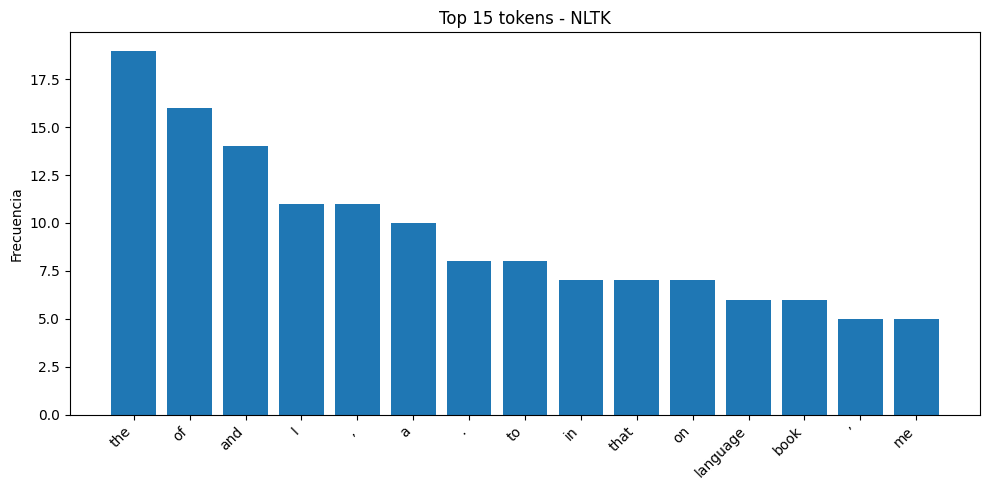

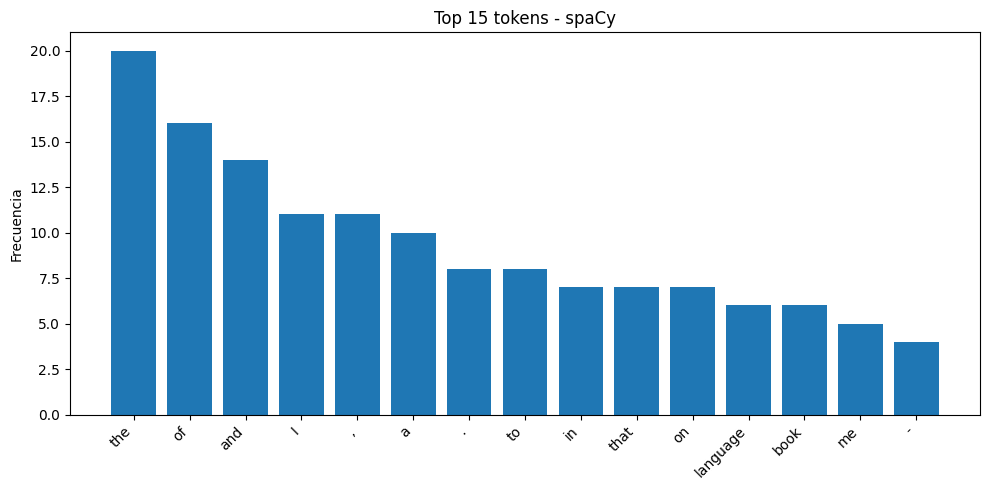

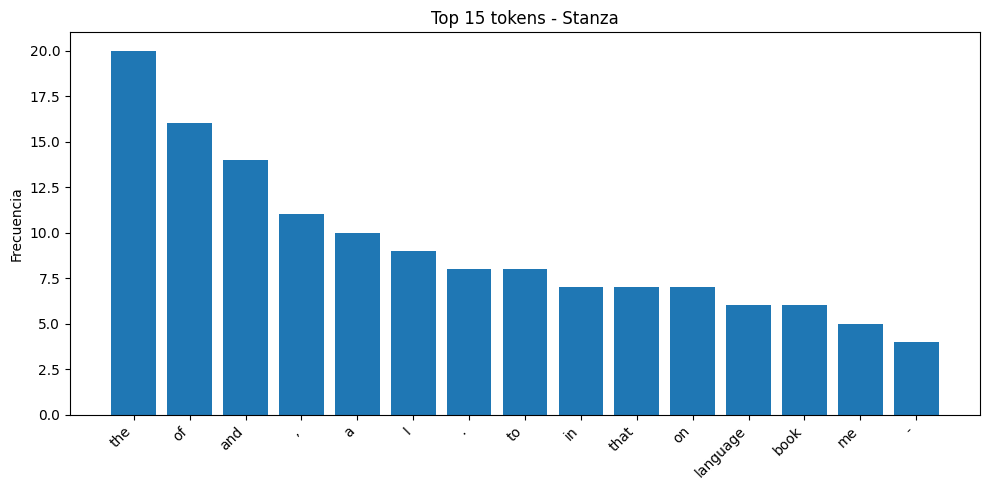

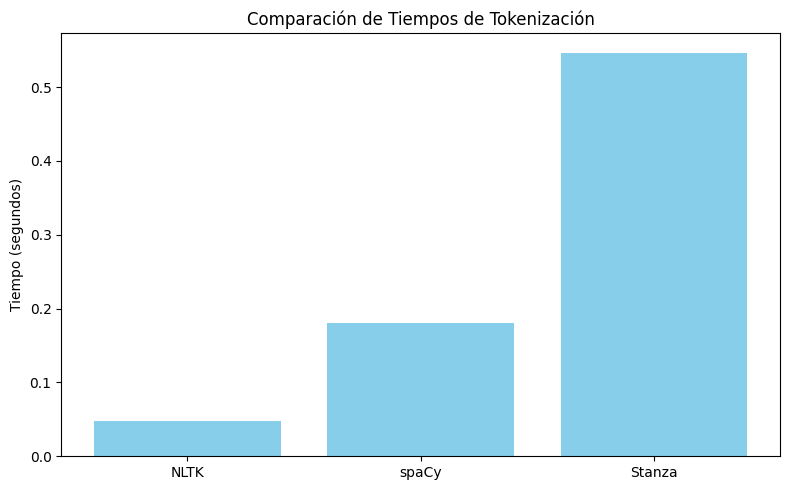

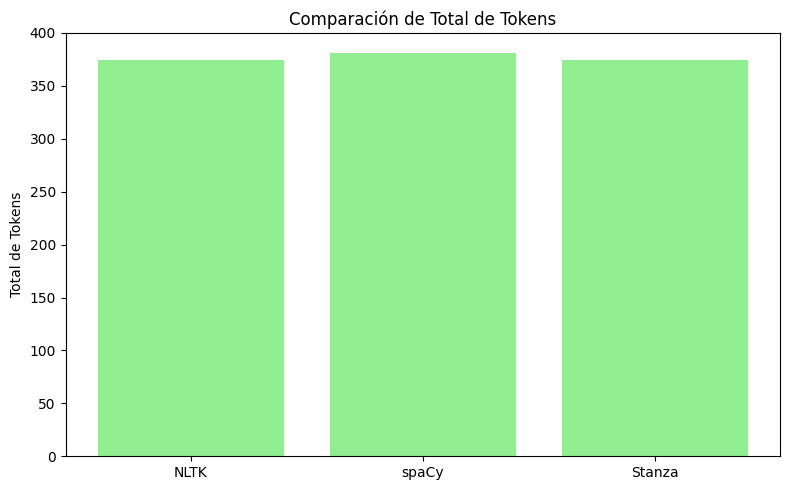

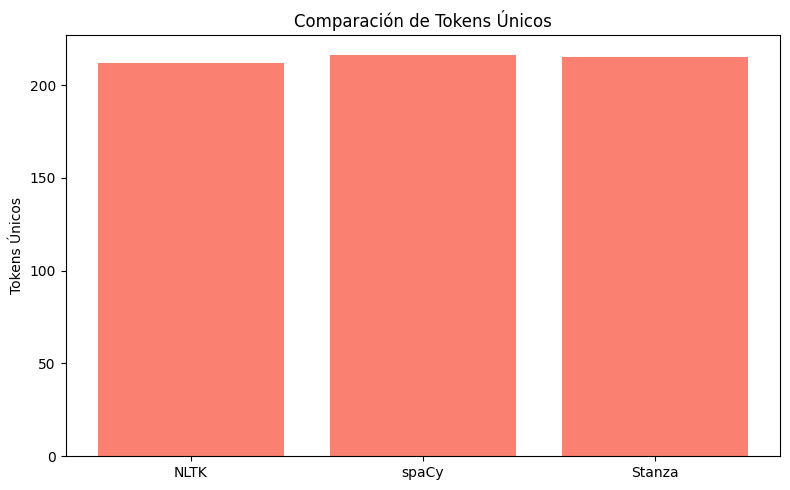

In [3]:
# --- Ejecutar el análisis para cada módulo ---
resultados = {}

# NLTK
tiempo_nltk, tokens_nltk, total_nltk, unicos_nltk, frec_nltk = analizar_tokenizacion(nltk_tokenizer, texto)
resultados['NLTK'] = {'tiempo': tiempo_nltk, 'total': total_nltk, 'unicos': unicos_nltk, 'frec': frec_nltk}

# spaCy
tiempo_spacy, tokens_spacy, total_spacy, unicos_spacy, frec_spacy = analizar_tokenizacion(spacy_tokenizer, texto)
resultados['spaCy'] = {'tiempo': tiempo_spacy, 'total': total_spacy, 'unicos': unicos_spacy, 'frec': frec_spacy}

# Stanza
tiempo_stanza, tokens_stanza, total_stanza, unicos_stanza, frec_stanza = analizar_tokenizacion(stanza_tokenizer, texto)
resultados['Stanza'] = {'tiempo': tiempo_stanza, 'total': total_stanza, 'unicos': unicos_stanza, 'frec': frec_stanza}

# Mostrar resultados básicos
for modulo, datos in resultados.items():
    print(f"{modulo}:")
    print(f"  Tiempo de tokenización: {datos['tiempo']:.4f} s")
    print(f"  Total de tokens: {datos['total']}")
    print(f"  Tokens únicos: {datos['unicos']}")
    print("")

# --- Generar histogramas de los 15 tokens más comunes para cada módulo ---
def plot_top_tokens(frecuencia, modulo):
    top15 = frecuencia.most_common(15)
    tokens, counts = zip(*top15)
    plt.figure(figsize=(10, 5))
    plt.bar(tokens, counts)
    plt.title(f"Top 15 tokens - {modulo}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for modulo, datos in resultados.items():
    plot_top_tokens(datos['frec'], modulo)

# --- Gráficos comparativos de tiempos, total de tokens y tokens únicos ---
modulos = list(resultados.keys())
tiempos = [resultados[m]['tiempo'] for m in modulos]
totales = [resultados[m]['total'] for m in modulos]
unicos = [resultados[m]['unicos'] for m in modulos]

# Gráfico comparativo de tiempos de tokenización
plt.figure(figsize=(8, 5))
plt.bar(modulos, tiempos, color='skyblue')
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de Tiempos de Tokenización")
plt.tight_layout()
plt.show()

# Gráfico comparativo de total de tokens
plt.figure(figsize=(8, 5))
plt.bar(modulos, totales, color='lightgreen')
plt.ylabel("Total de Tokens")
plt.title("Comparación de Total de Tokens")
plt.tight_layout()
plt.show()

# Gráfico comparativo de tokens únicos
plt.figure(figsize=(8, 5))
plt.bar(modulos, unicos, color='salmon')
plt.ylabel("Tokens Únicos")
plt.title("Comparación de Tokens Únicos")
plt.tight_layout()
plt.show()


A continuación se presenta el contenido para la parte de normalización de textos en inglés utilizando tres módulos (NLTK, spaCy y Stanza). Se incluyen funciones para realizar un pipeline de normalización que ejecuta al menos 6 tareas:  
1. Conversión a minúsculas  
2. Remoción de dígitos  
3. Remoción de puntuación  
4. Tokenización  
5. Remoción de “stop words”  
6. Aplicación de stemming y lematización  
7. (Adicional) Filtrado de tokens no alfabéticos y de longitud inferior a 3 caracteres  

El orden de ejecución se justifica de la siguiente forma:  
- Primero se normaliza el texto a minúsculas y se eliminan caracteres no alfabéticos (números y puntuación) para homogeneizar la entrada.  
- Luego se tokeniza para trabajar con unidades lingüísticas.  
- La eliminación de “stop words” reduce ruido en el análisis posterior.  
- Se aplican técnicas de stemming y lematización para reducir la variabilidad léxica.  
- Finalmente, se realiza un filtrado adicional para eliminar tokens cortos o irrelevantes.  

Esta secuencia garantiza que cada paso se aplique sobre un texto ya “limpio” y homogéneo, lo que mejora la calidad y consistencia de la normalización.  
A continuación se presenta el abstract en Markdown y el código correspondiente para la normalización con cada módulo, junto con la comparación de resultados y tiempos.

---

## Resumen del Enfoque

- **Pipeline de Normalización:**  
  Cada módulo sigue una serie de pasos para homogeneizar el texto: se transforma a minúsculas, se eliminan dígitos y puntuación, se tokeniza, se eliminan stop words, se aplica stemming y lematización, y finalmente se filtran tokens irrelevantes.  
- **Justificación del Orden:**  
  La conversión a minúsculas y la eliminación de caracteres no deseados garantizan una base homogénea. La tokenización permite trabajar a nivel de palabra. La remoción de stop words reduce el ruido y las técnicas de stemming y lematización minimizan la variabilidad léxica. Los filtros adicionales aseguran la relevancia de los tokens resultantes.  
- **Comparación y Visualización:**  
  Se miden tiempos de ejecución y se comparan métricas (total y tokens únicos), lo que permite evaluar tanto la calidad de la normalización como el rendimiento de cada módulo.

[nltk_data] Downloading package punkt to /home/pillofon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pillofon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pillofon/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


NLTK:
  Tiempo de normalización: 3.9736 s
  Total de tokens normalizados: 172
  Tokens únicos: 136

spaCy:
  Tiempo de normalización: 0.0648 s
  Total de tokens normalizados: 160
  Tokens únicos: 119

Stanza:
  Tiempo de normalización: 0.0826 s
  Total de tokens normalizados: 171
  Tokens únicos: 133



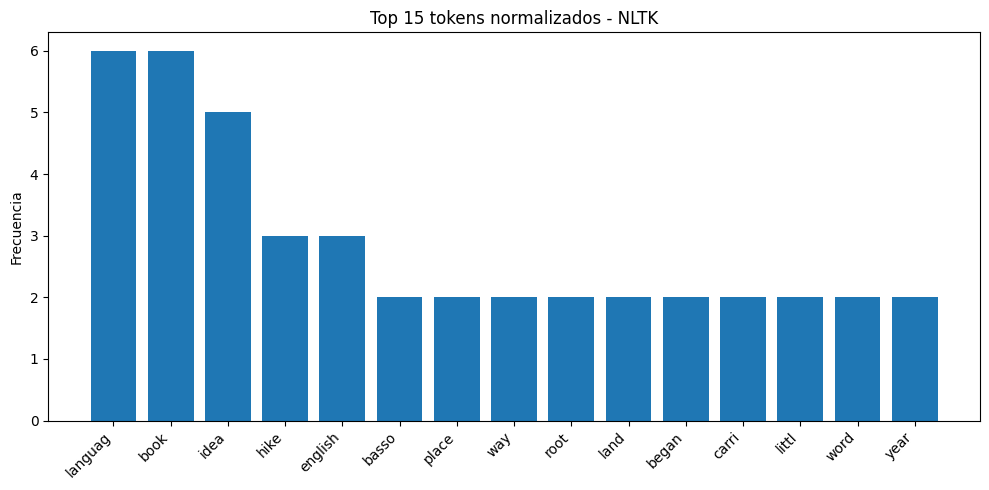

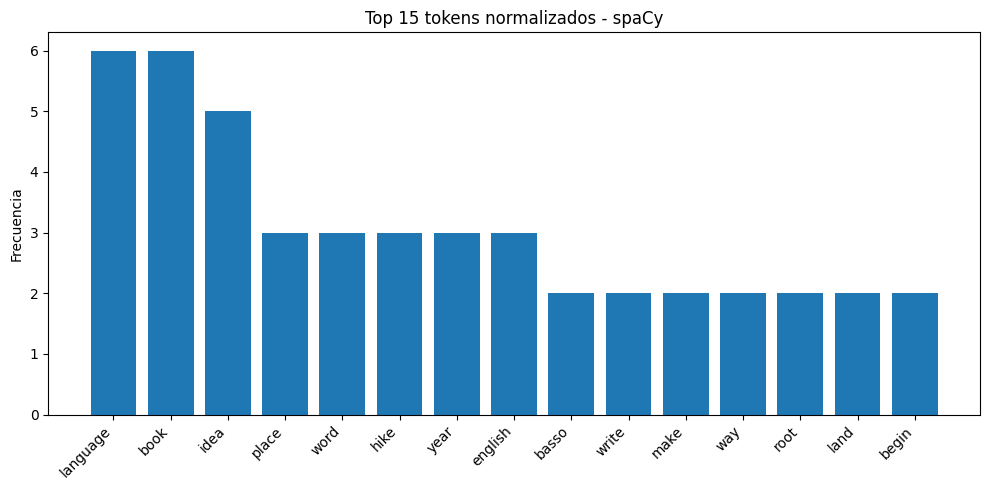

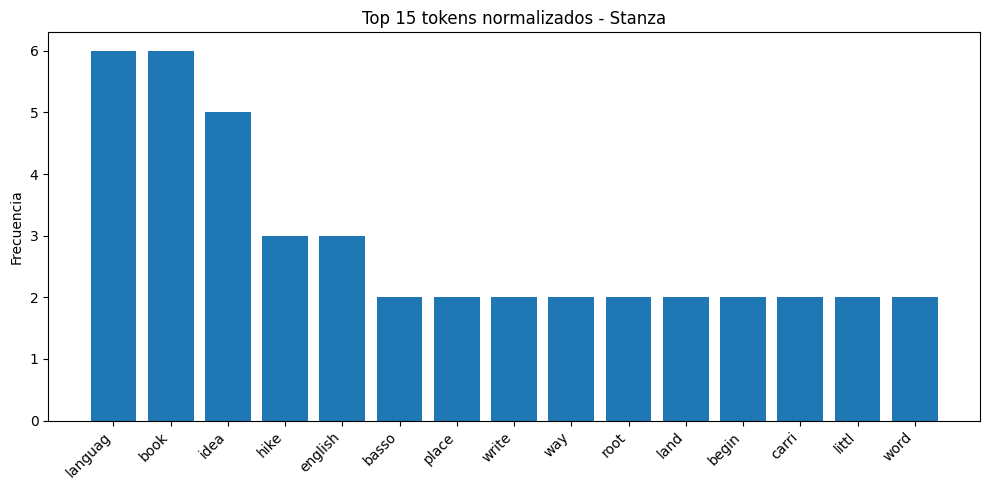

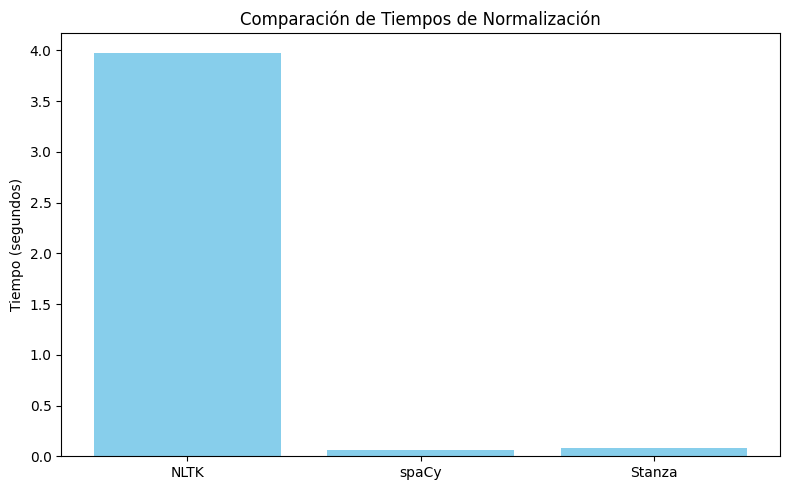

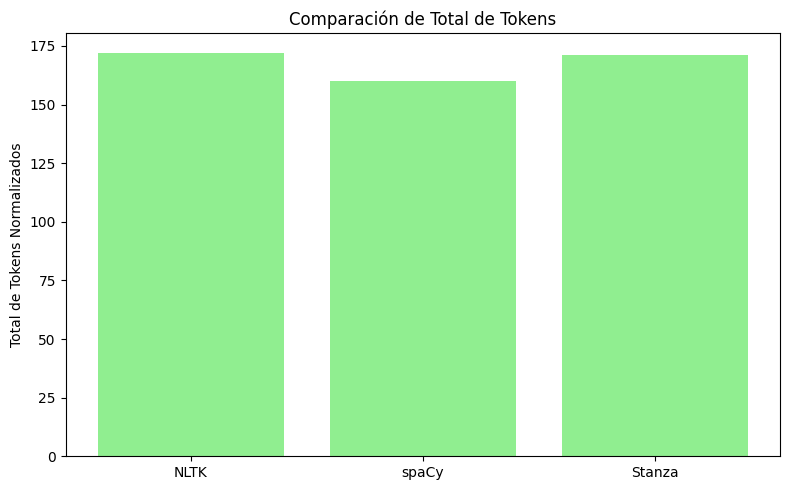

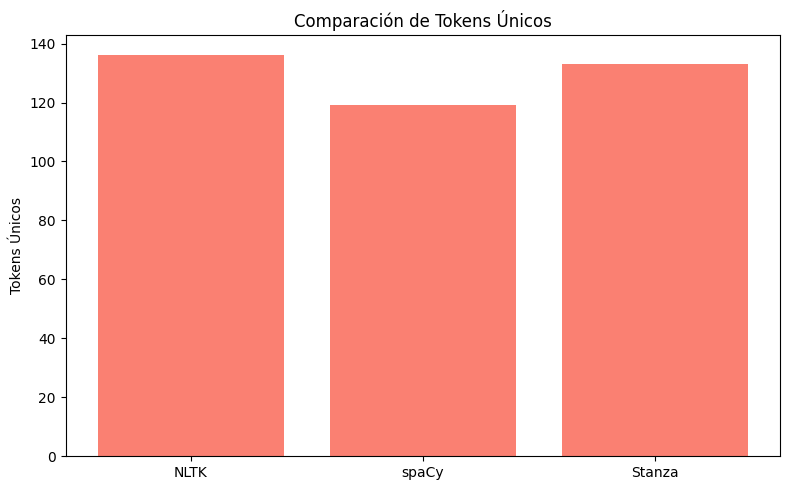

In [4]:
# %% [code]
import time
import re
import matplotlib.pyplot as plt
from collections import Counter

# --- Carga del texto de ejemplo (AnexoBEnglish.txt) ---
ruta_texto = 'AnexoBEnglish.txt'
with open(ruta_texto, 'r', encoding='utf-8') as file:
    texto = file.read()

# -----------------------------------------------------
# Normalización con NLTK
# -----------------------------------------------------
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def normalize_nltk(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Remover dígitos y puntuación
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Tokenización
    tokens = word_tokenize(text)
    # 4. Remover stop words
    tokens = [t for t in tokens if t not in stop_words]
    # 5. Aplicar stemming
    tokens_stemmed = [ps.stem(t) for t in tokens]
    # 6. Aplicar lematización sobre el resultado del stemming
    tokens_lemmatized = [lemmatizer.lemmatize(t) for t in tokens_stemmed]
    # 7. Tareas adicionales: eliminar tokens no alfabéticos y de longitud inferior a 3
    tokens_final = [t for t in tokens_lemmatized if t.isalpha() and len(t) >= 3]
    return tokens_final

def process_nltk(text):
    inicio = time.time()
    tokens = normalize_nltk(text)
    fin = time.time()
    return fin - inicio, tokens

# -----------------------------------------------------
# Normalización con spaCy
# -----------------------------------------------------
import spacy
nlp_en = spacy.load("en_core_web_sm")

def normalize_spacy(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Procesar el texto con spaCy (el tokenizador ya maneja puntuación y dígitos)
    doc = nlp_en(text)
    # 3. Extraer tokens lematizados, eliminando stop words y tokens no alfabéticos
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    # 4. Tareas adicionales: eliminar tokens de longitud inferior a 3
    tokens = [t for t in tokens if len(t) >= 3]
    return tokens

def process_spacy(text):
    inicio = time.time()
    tokens = normalize_spacy(text)
    fin = time.time()
    return fin - inicio, tokens

# -----------------------------------------------------
# Normalización con Stanza
# -----------------------------------------------------
import stanza
# Descargar y cargar el pipeline con tokenización y lematización
stanza.download('en', verbose=False)
nlp_stanza = stanza.Pipeline('en', processors='tokenize,lemma', verbose=False)

def normalize_stanza(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Remover dígitos y puntuación
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Procesar el texto con Stanza
    doc = nlp_stanza(text)
    # 4. Extraer lemas (Stanza ya aplica lematización)
    tokens = []
    for sentence in doc.sentences:
        for word in sentence.words:
            tokens.append(word.lemma)
    # 5. Remover stop words (usamos la lista de NLTK)
    tokens = [t for t in tokens if t not in stop_words]
    # 6. Aplicar stemming con NLTK (como técnica adicional, ya que Stanza no tiene stemmer integrado)
    tokens = [ps.stem(t) for t in tokens]
    # 7. Tareas adicionales: eliminar tokens no alfabéticos y de longitud inferior a 3
    tokens = [t for t in tokens if t.isalpha() and len(t) >= 3]
    return tokens

def process_stanza(text):
    inicio = time.time()
    tokens = normalize_stanza(text)
    fin = time.time()
    return fin - inicio, tokens

# -----------------------------------------------------
# Procesar y comparar resultados
# -----------------------------------------------------
resultados_norm = {}

# NLTK
tiempo_nltk, tokens_nltk = process_nltk(texto)
resultados_norm['NLTK'] = {
    'tiempo': tiempo_nltk,
    'total': len(tokens_nltk),
    'unicos': len(set(tokens_nltk)),
    'frecuencia': Counter(tokens_nltk)
}

# spaCy
tiempo_spacy, tokens_spacy = process_spacy(texto)
resultados_norm['spaCy'] = {
    'tiempo': tiempo_spacy,
    'total': len(tokens_spacy),
    'unicos': len(set(tokens_spacy)),
    'frecuencia': Counter(tokens_spacy)
}

# Stanza
tiempo_stanza, tokens_stanza = process_stanza(texto)
resultados_norm['Stanza'] = {
    'tiempo': tiempo_stanza,
    'total': len(tokens_stanza),
    'unicos': len(set(tokens_stanza)),
    'frecuencia': Counter(tokens_stanza)
}

# Mostrar resultados básicos
for modulo, datos in resultados_norm.items():
    print(f"{modulo}:")
    print(f"  Tiempo de normalización: {datos['tiempo']:.4f} s")
    print(f"  Total de tokens normalizados: {datos['total']}")
    print(f"  Tokens únicos: {datos['unicos']}\n")

# -----------------------------------------------------
# Histogramas de los 15 tokens más frecuentes para cada módulo
# -----------------------------------------------------
def plot_top_tokens(frecuencia, modulo):
    top15 = frecuencia.most_common(15)
    tokens, counts = zip(*top15)
    plt.figure(figsize=(10, 5))
    plt.bar(tokens, counts)
    plt.title(f"Top 15 tokens normalizados - {modulo}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

for modulo, datos in resultados_norm.items():
    plot_top_tokens(datos['frecuencia'], modulo)

# -----------------------------------------------------
# Gráficos comparativos de los 3 módulos
# -----------------------------------------------------
modulos = list(resultados_norm.keys())
tiempos = [resultados_norm[m]['tiempo'] for m in modulos]
totales = [resultados_norm[m]['total'] for m in modulos]
unicos = [resultados_norm[m]['unicos'] for m in modulos]

# Comparación de tiempos de normalización
plt.figure(figsize=(8, 5))
plt.bar(modulos, tiempos, color='skyblue')
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de Tiempos de Normalización")
plt.tight_layout()
plt.show()

# Comparación de total de tokens normalizados
plt.figure(figsize=(8, 5))
plt.bar(modulos, totales, color='lightgreen')
plt.ylabel("Total de Tokens Normalizados")
plt.title("Comparación de Total de Tokens")
plt.tight_layout()
plt.show()

# Comparación de tokens únicos
plt.figure(figsize=(8, 5))
plt.bar(modulos, unicos, color='salmon')
plt.ylabel("Tokens Únicos")
plt.title("Comparación de Tokens Únicos")
plt.tight_layout()
plt.show()


### Versión en español

[nltk_data] Downloading package punkt to /home/pillofon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pillofon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Análisis Exploratorio - Texto Original (Español)
NLTK:
  Tiempo de tokenización: 0.0243 s
  Total de tokens: 373
  Tokens únicos: 195

spaCy:
  Tiempo de tokenización: 0.0652 s
  Total de tokens: 377
  Tokens únicos: 198

Stanza:
  Tiempo de tokenización: 0.1062 s
  Total de tokens: 370
  Tokens únicos: 196



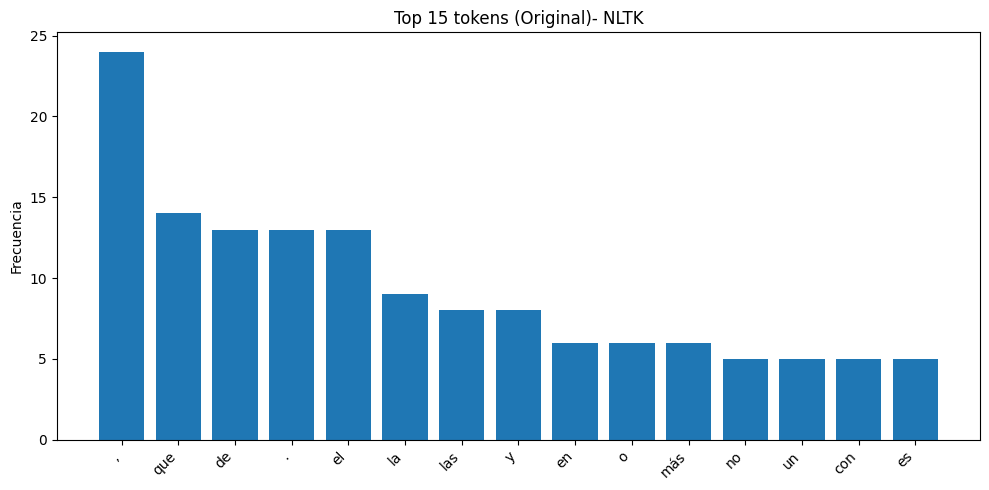

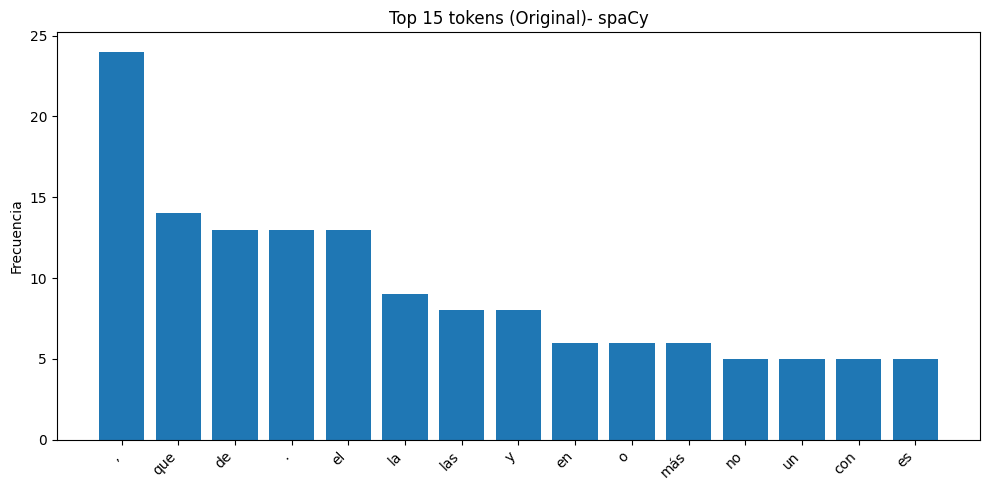

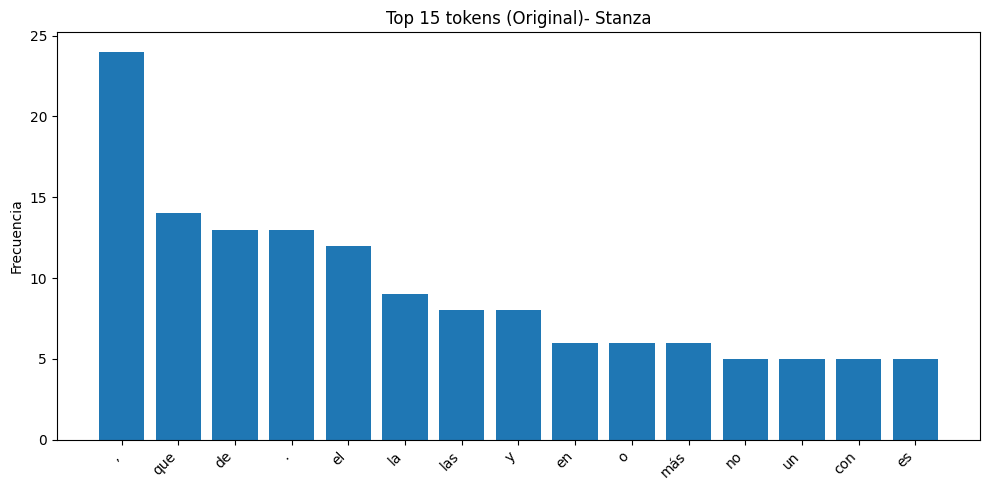

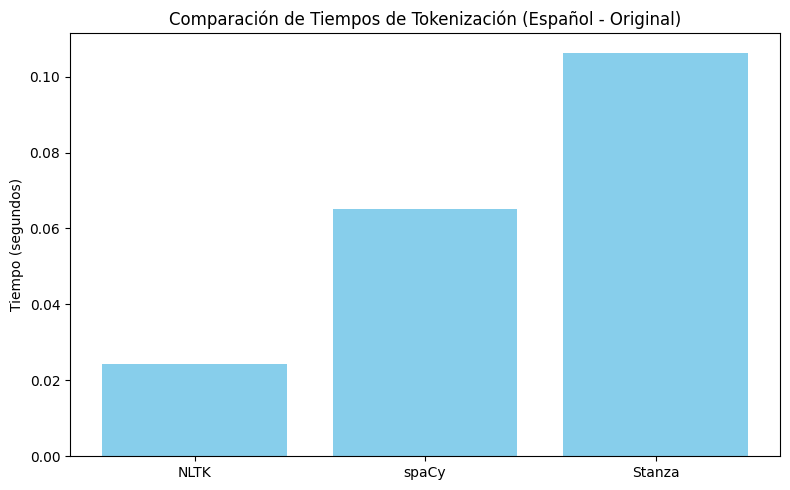

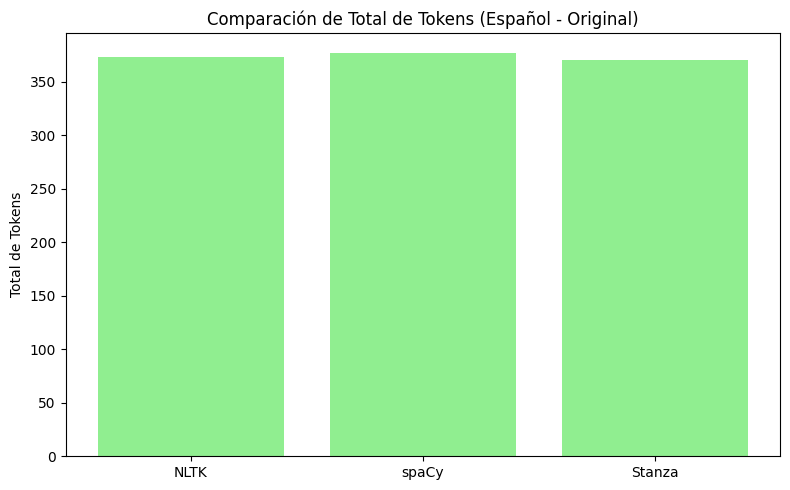

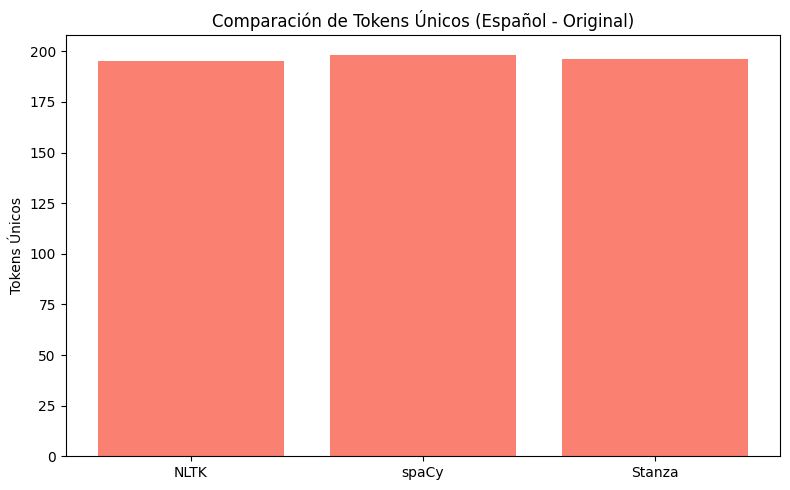

In [5]:
# Cargar el texto en español
ruta_texto_es = 'AnexoBSpanish.txt'
with open(ruta_texto_es, 'r', encoding='utf-8') as file:
    texto_es = file.read()

# -----------------------------
# Tokenización con NLTK para español
# -----------------------------
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words_es = set(stopwords.words('spanish'))

def nltk_tokenizer_es(text):
    # NLTK usa el tokenizador Punkt (idioma agnóstico) pero se puede usar para español
    return word_tokenize(text, language='spanish')

def process_nltk_es(text):
    inicio = time.time()
    tokens = nltk_tokenizer_es(text)
    fin = time.time()
    total_tokens = len(tokens)
    tokens_unicos = len(set(tokens))
    frec = Counter(tokens)
    return fin - inicio, tokens, total_tokens, tokens_unicos, frec

# -----------------------------
# Tokenización con spaCy para español
# -----------------------------
import spacy
try:
    nlp_es = spacy.load("es_core_news_sm")
except OSError:
    # Si no está instalado, se puede instalar con: python -m spacy download es_core_news_sm
    raise Exception("El modelo es_core_news_sm para spaCy no se encuentra instalado.")

def spacy_tokenizer_es(text):
    doc = nlp_es(text)
    return [token.text for token in doc]

def process_spacy_es(text):
    inicio = time.time()
    tokens = spacy_tokenizer_es(text)
    fin = time.time()
    total_tokens = len(tokens)
    tokens_unicos = len(set(tokens))
    frec = Counter(tokens)
    return fin - inicio, tokens, total_tokens, tokens_unicos, frec

# -----------------------------
# Tokenización con Stanza para español
# -----------------------------
import stanza
stanza.download('es', verbose=False)
nlp_stanza_es = stanza.Pipeline('es', processors='tokenize,lemma', verbose=False)

def stanza_tokenizer_es(text):
    doc = nlp_stanza_es(text)
    tokens = []
    for sentence in doc.sentences:
        tokens.extend([token.text for token in sentence.tokens])
    return tokens

def process_stanza_es(text):
    inicio = time.time()
    tokens = stanza_tokenizer_es(text)
    fin = time.time()
    total_tokens = len(tokens)
    tokens_unicos = len(set(tokens))
    frec = Counter(tokens)
    return fin - inicio, tokens, total_tokens, tokens_unicos, frec

# -----------------------------
# Ejecutar análisis exploratorio para cada módulo (Español)
# -----------------------------
resultados_es_exploratorio = {}

# NLTK
tiempo_nltk_es, tokens_nltk_es, total_nltk_es, unicos_nltk_es, frec_nltk_es = process_nltk_es(texto_es)
resultados_es_exploratorio['NLTK'] = {
    'tiempo': tiempo_nltk_es,
    'total': total_nltk_es,
    'unicos': unicos_nltk_es,
    'frecuencia': frec_nltk_es
}

# spaCy
tiempo_spacy_es, tokens_spacy_es, total_spacy_es, unicos_spacy_es, frec_spacy_es = process_spacy_es(texto_es)
resultados_es_exploratorio['spaCy'] = {
    'tiempo': tiempo_spacy_es,
    'total': total_spacy_es,
    'unicos': unicos_spacy_es,
    'frecuencia': frec_spacy_es
}

# Stanza
tiempo_stanza_es, tokens_stanza_es, total_stanza_es, unicos_stanza_es, frec_stanza_es = process_stanza_es(texto_es)
resultados_es_exploratorio['Stanza'] = {
    'tiempo': tiempo_stanza_es,
    'total': total_stanza_es,
    'unicos': unicos_stanza_es,
    'frecuencia': frec_stanza_es
}

# Mostrar resultados exploratorios básicos
print("Análisis Exploratorio - Texto Original (Español)")
for modulo, datos in resultados_es_exploratorio.items():
    print(f"{modulo}:")
    print(f"  Tiempo de tokenización: {datos['tiempo']:.4f} s")
    print(f"  Total de tokens: {datos['total']}")
    print(f"  Tokens únicos: {datos['unicos']}\n")

# Función para graficar top 15 tokens
def plot_top_tokens(frecuencia, modulo, titulo_extra=""):
    top15 = frecuencia.most_common(15)
    if not top15:
        print(f"No hay tokens para mostrar en {modulo} {titulo_extra}.")
        return
    tokens, counts = zip(*top15)
    plt.figure(figsize=(10, 5))
    plt.bar(tokens, counts)
    plt.title(f"Top 15 tokens {titulo_extra}- {modulo}")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()


for modulo, datos in resultados_es_exploratorio.items():
    plot_top_tokens(datos['frecuencia'], modulo, titulo_extra="(Original)")

# Gráficos comparativos de métricas exploratorias
modulos = list(resultados_es_exploratorio.keys())
tiempos = [resultados_es_exploratorio[m]['tiempo'] for m in modulos]
totales = [resultados_es_exploratorio[m]['total'] for m in modulos]
unicos = [resultados_es_exploratorio[m]['unicos'] for m in modulos]

plt.figure(figsize=(8, 5))
plt.bar(modulos, tiempos, color='skyblue')
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de Tiempos de Tokenización (Español - Original)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(modulos, totales, color='lightgreen')
plt.ylabel("Total de Tokens")
plt.title("Comparación de Total de Tokens (Español - Original)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(modulos, unicos, color='salmon')
plt.ylabel("Tokens Únicos")
plt.title("Comparación de Tokens Únicos (Español - Original)")
plt.tight_layout()
plt.show()

In [6]:
stop_words_es

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f


Análisis Post Normalización - Texto en Español
NLTK:
  Tiempo de normalización: 0.0034 s
  Total de tokens normalizados: 158
  Tokens únicos: 124

spaCy:
  Tiempo de normalización: 0.0524 s
  Total de tokens normalizados: 135
  Tokens únicos: 110

Stanza:
  Tiempo de normalización: 0.0803 s
  Total de tokens normalizados: 172
  Tokens únicos: 126



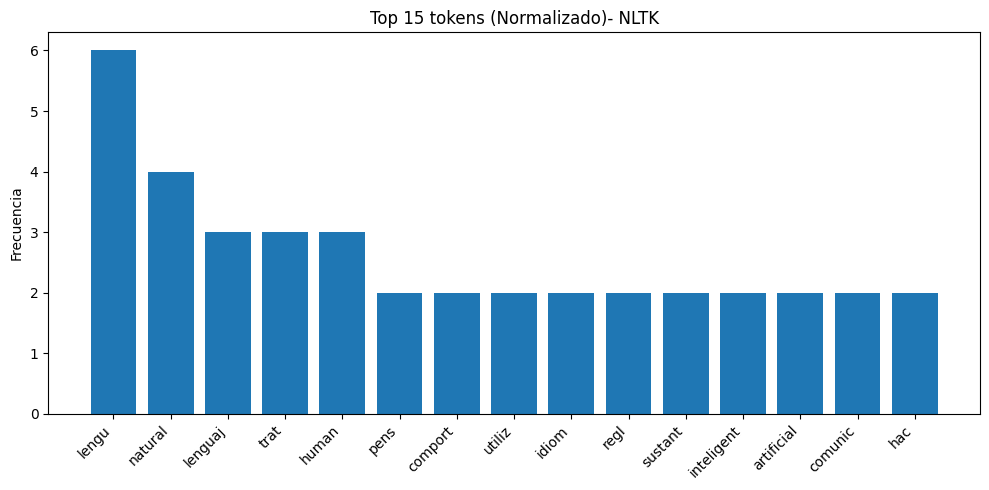

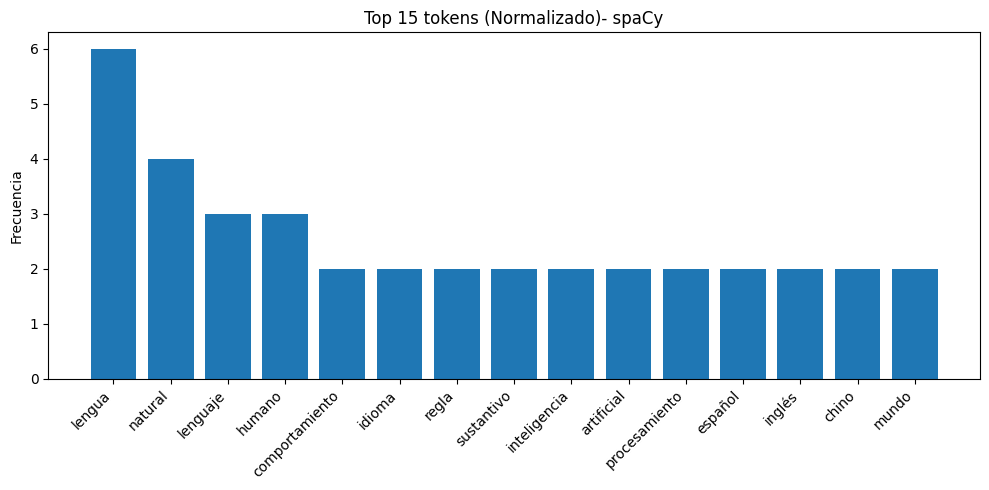

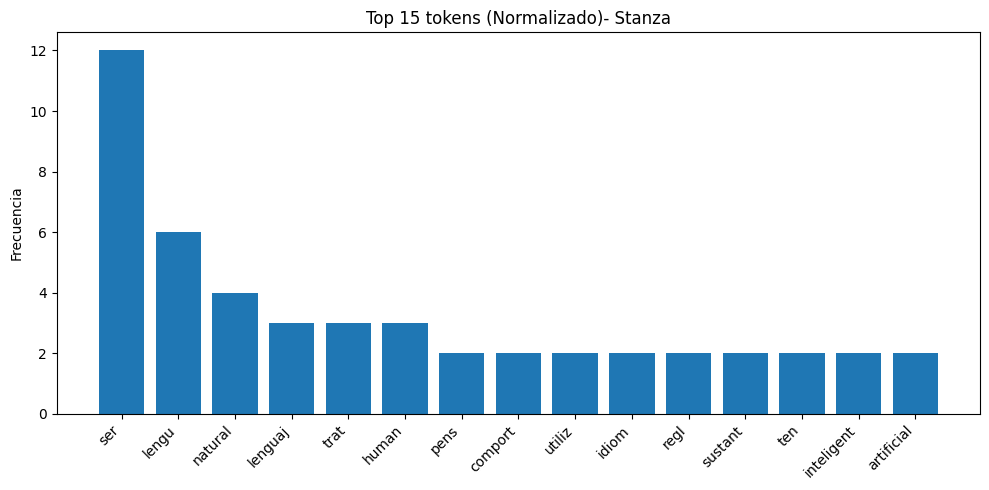

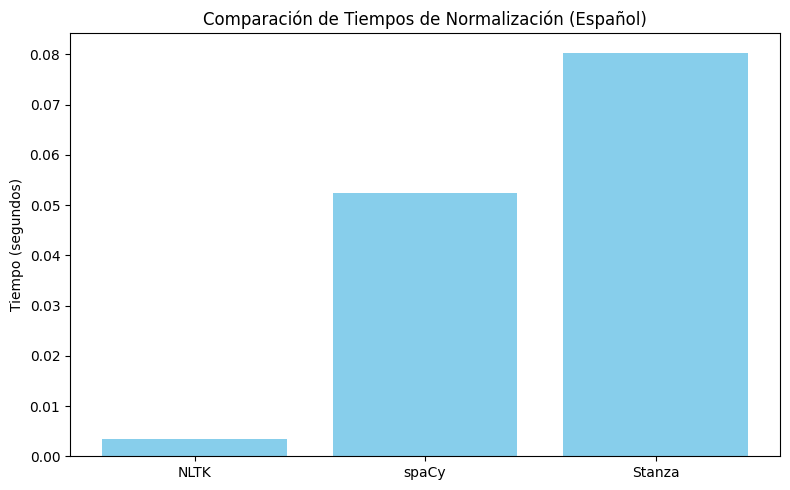

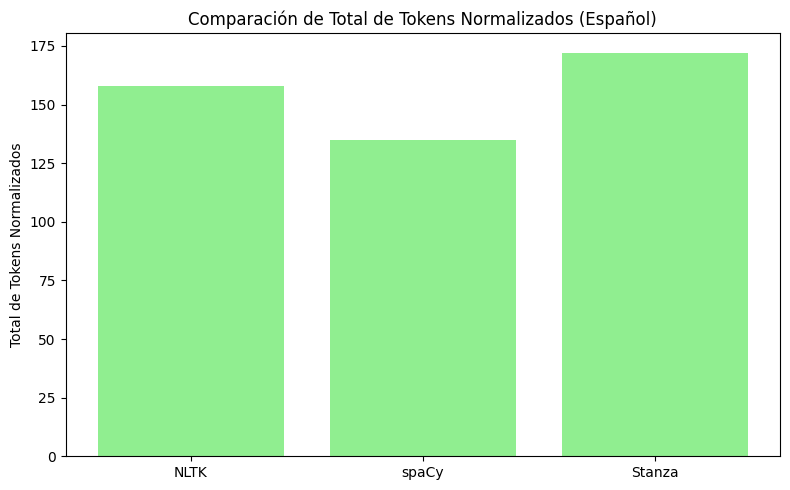

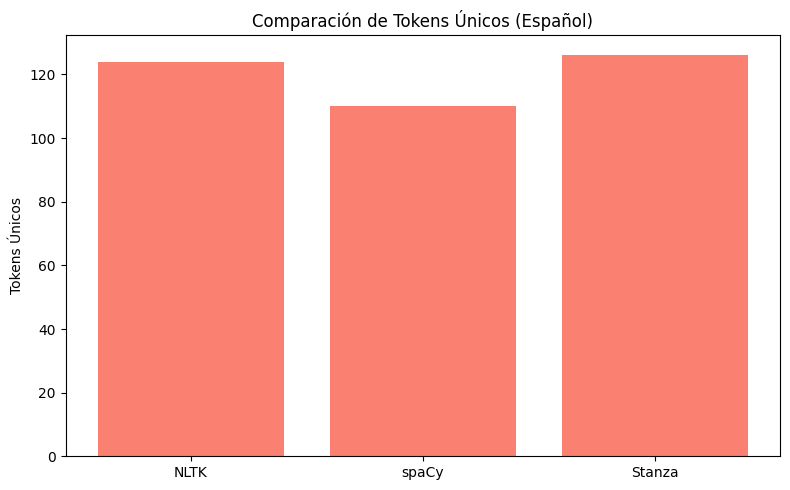

In [7]:
from nltk.stem import SnowballStemmer
stemmer_es = SnowballStemmer('spanish')

def normalize_nltk_es(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Remover dígitos y puntuación
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Tokenización
    tokens = nltk_tokenizer_es(text)
    # 4. Remover stop words
    tokens = [t for t in tokens if t not in stop_words_es]
    # 5. Aplicar stemming
    tokens_stemmed = [stemmer_es.stem(t) for t in tokens]
    # 6. Aplicar lematización (usando WordNet no es ideal para español; se usará el stemming como aproximación)
    # 7. Tareas adicionales: eliminar tokens no alfabéticos y de longitud inferior a 3
    tokens_final = [t for t in tokens_stemmed if t.isalpha() and len(t) >= 3]
    return tokens_final

def process_nltk_es_norm(text):
    inicio = time.time()
    tokens = normalize_nltk_es(text)
    fin = time.time()
    return fin - inicio, tokens

def normalize_spacy_es(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Procesar el texto con spaCy (el tokenizador ya maneja puntuación y dígitos)
    doc = nlp_es(text)
    # 3. Extraer tokens lematizados, eliminando stop words y tokens no alfabéticos
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    # 4. Tareas adicionales: eliminar tokens de longitud inferior a 3
    tokens = [t for t in tokens if len(t) >= 3]
    return tokens

def process_spacy_es_norm(text):
    inicio = time.time()
    tokens = normalize_spacy_es(text)
    fin = time.time()
    return fin - inicio, tokens

def normalize_stanza_es(text):
    # 1. Convertir a minúsculas
    text = text.lower()
    # 2. Remover dígitos y puntuación
    text = re.sub(r'[\d]', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Procesar el texto con Stanza (tokenización y lematización)
    doc = nlp_stanza_es(text)
    
    tokens = []
    for sentence in doc.sentences:
        for word in sentence.words:
            tokens.append(word.lemma)

    # 4. Remover stop words (usamos la lista de NLTK para español)
    tokens = [t for t in tokens if t and t not in stop_words_es]

    # 5. Aplicar stemming con NLTK (SnowballStemmer para español)
    tokens = [stemmer_es.stem(t) for t in tokens if t]
    # 6. Tareas adicionales: eliminar tokens no alfabéticos y de longitud inferior a 3
    tokens = [t for t in tokens if t.isalpha() and len(t) >= 3]
    return tokens


def process_stanza_es_norm(text):
    inicio = time.time()
    tokens = normalize_stanza_es(text)
    fin = time.time()
    return fin - inicio, tokens

# Ejecutar normalización post procesamiento para cada módulo
resultados_es_norm = {}

# NLTK Normalización
tiempo_nltk_es_norm, tokens_nltk_es_norm = process_nltk_es_norm(texto_es)
resultados_es_norm['NLTK'] = {
    'tiempo': tiempo_nltk_es_norm,
    'total': len(tokens_nltk_es_norm),
    'unicos': len(set(tokens_nltk_es_norm)),
    'frecuencia': Counter(tokens_nltk_es_norm)
}

# spaCy Normalización
tiempo_spacy_es_norm, tokens_spacy_es_norm = process_spacy_es_norm(texto_es)
resultados_es_norm['spaCy'] = {
    'tiempo': tiempo_spacy_es_norm,
    'total': len(tokens_spacy_es_norm),
    'unicos': len(set(tokens_spacy_es_norm)),
    'frecuencia': Counter(tokens_spacy_es_norm)
}

# Stanza Normalización
tiempo_stanza_es_norm, tokens_stanza_es_norm = process_stanza_es_norm(texto_es)
resultados_es_norm['Stanza'] = {
    'tiempo': tiempo_stanza_es_norm,
    'total': len(tokens_stanza_es_norm),
    'unicos': len(set(tokens_stanza_es_norm)),
    'frecuencia': Counter(tokens_stanza_es_norm)
}

# Mostrar resultados de normalización
print("\nAnálisis Post Normalización - Texto en Español")
for modulo, datos in resultados_es_norm.items():
    print(f"{modulo}:")
    print(f"  Tiempo de normalización: {datos['tiempo']:.4f} s")
    print(f"  Total de tokens normalizados: {datos['total']}")
    print(f"  Tokens únicos: {datos['unicos']}\n")

# Histogramas de los 15 tokens más frecuentes para cada módulo (Normalizados)
for modulo, datos in resultados_es_norm.items():
    plot_top_tokens(datos['frecuencia'], modulo, titulo_extra="(Normalizado)")

# Gráficos comparativos para normalización
modulos_norm = list(resultados_es_norm.keys())
tiempos_norm = [resultados_es_norm[m]['tiempo'] for m in modulos_norm]
totales_norm = [resultados_es_norm[m]['total'] for m in modulos_norm]
unicos_norm = [resultados_es_norm[m]['unicos'] for m in modulos_norm]

plt.figure(figsize=(8, 5))
plt.bar(modulos_norm, tiempos_norm, color='skyblue')
plt.ylabel("Tiempo (segundos)")
plt.title("Comparación de Tiempos de Normalización (Español)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(modulos_norm, totales_norm, color='lightgreen')
plt.ylabel("Total de Tokens Normalizados")
plt.title("Comparación de Total de Tokens Normalizados (Español)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(modulos_norm, unicos_norm, color='salmon')
plt.ylabel("Tokens Únicos")
plt.title("Comparación de Tokens Únicos (Español)")
plt.tight_layout()
plt.show()